# Issues (task) covered in this feature notebook :

*  explore data a bit w/modules, functions and plots
*  baseline model test
    - KNN classifier 
    - Logistic regression or Dummy Classifier ?
    - or Clustering algorithm ?
    - or treebased ?
* base metrics 
    - precision, recall
    - f1_score
    - accuracy, balanced accuracy
    - classification report
    - confusion matrix
    - area under the curve

* train_test_split


[Project Issue Link](https://github.com/users/Cazta/projects/1/views/2?pane=issue&itemId=32899160)



# Importing Packages

In [2]:
# import necessary libraries

import pandas as pd
import numpy as np
import missingno as msno 
import seaborn as sns
import matplotlib.pyplot as plt 

#sklearn

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# import custom functions

from custom_functions import get_data_summary, our_metrics, eval_metrics#, evaluate_model


import warnings
warnings.filterwarnings('ignore')

# Global Variables

In [3]:
# global variables

# for reproducibility sake
RSEED = 42

# data path to load version 1 of the processed fraud data
data_path = 'data/fraud_data_processed_V1.csv'




# Loading Data

In [4]:
# import stored DataFrame
#%store -r df_processed_dmy

In [5]:
# this contains all the numerical (unscaled) and dummies from categorical
df_cleaned = pd.read_csv('data/df_processed_dmy.csv')
df_cleaned

,target,member_years,index_change_month,quantity_counters,client_catg_12,client_catg_51,region_103,region_104,region_105,region_106,...,tarif_type_45,counter_statue_1.0,counter_statue_2.0,counter_statue_3.0,counter_statue_4.0,counter_statue_5.0,reading_remarque_7,reading_remarque_8,reading_remarque_9,counter_type_GAZ
0,0,20,20.500000,35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,19,346.000000,35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,21,30.750000,35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,21,25.500000,35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,22,47.666667,35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476685,0,12,66.875000,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4476686,0,12,51.500000,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4476687,0,10,64.750000,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4476688,0,10,150.750000,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_cleaned_tree = pd.read_csv('data/df_processed_dmy_tree.csv')
df_cleaned_tree

,target,member_years,index_change_month,quantity_counters,client_catg_11,client_catg_12,client_catg_51,region_101,region_103,region_104,...,counter_statue_2.0,counter_statue_3.0,counter_statue_4.0,counter_statue_5.0,reading_remarque_6,reading_remarque_7,reading_remarque_8,reading_remarque_9,counter_type_ELEC,counter_type_GAZ
0,0,20,20.500000,35,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,19,346.000000,35,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,21,30.750000,35,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,0,21,25.500000,35,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,22,47.666667,35,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4476685,0,12,66.875000,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
4476686,0,12,51.500000,2,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4476687,0,10,64.750000,3,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4476688,0,10,150.750000,3,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [7]:
# load version 1 of the processed fraud data

#df = get_data_summary(data_path = data_path, desc_sm = True, no_unq = True)

In [8]:
# # grouping by client id's using the aggregate : count

# df_gb_clients = df.groupby('client_id').count().reset_index()

# # curious grouped dataframe summary : by client's id count

# #how many invoices per client
# df_gb_clients_sm = get_data_summary(data = df_gb_clients)

---

# Brief Exploration / Hypothesis

* Stakeholder : STEG (Tunisian Company of Electricity and Gas)
* Business objective : To use client's billing history to predict which clients are probably fraudulently manipulating their energy (electricity and gas) meters
* open questions : 
    - What does the consumption  (consummation?) levels tell us about fraudulent activities? 
    - What does the recorded reading remark  tell us about fraudulent activities? 
    - etc

* hypothesis statements :
    - very low consumption levels are an indicator of fraud.
    - client_category is a predictor for fraud.
    - geographical location (district, region) is an indicator for fraud.
    - not having any consummation at level 2 and higher is an indicator for fraud.
    - certain reading_remarques are an indicator of fraud.

* possible future stakeholders / use cases: 
    - other Gas or Electricity Companies
    - Law enforcement agencies
    - state authorities for utilities


* aggregating some data to gain insight
* basic plots to investigate the data visually
    - countplots
    - 

    

In [9]:
# grouping by client id's using the aggregate : count

# df_gb_clients = df.groupby('client_id').count().reset_index()

# # curious grouped dataframe summary : by client's id count

# #how many invoices per client
# df_gb_clients_sm = get_data_summary(data = df_gb_clients)




In [10]:

# # countplots of specific features by target

# cat_features = ['disrict', 'client_catg', 'region',  'tarif_type', 
#                     'counter_statue', 'reading_remarque', 'counter_coefficient']

# for i in cat_features:
#     fig = plt.figure(figsize=(12,5))
#     sns.countplot(data=df, x=df[i], hue=df["target"])
#     plt.show();

In [11]:
#fig = plt.figure(figsize=(12,5))
#sns.countplot(df.query('tarif_type >= 12 and tarif_type <=14'), x=df.query('tarif_type >= 12 and tarif_type <=14')['tarif_type'], hue=df["target"])
#plt.show();

In [12]:
# fig = plt.figure(figsize=(12,5))
# sns.countplot(df, x=df['target'])
# plt.show();

In [13]:
# fig = plt.figure(figsize=(12,5))
# sns.countplot(df.query('consommation_level_2 == 0 and consommation_level_3 == 0 and consommation_level_4 == 0'), x=df.query('consommation_level_2 == 0 and consommation_level_3 == 0 and consommation_level_4 == 0')['target'])
# plt.show();

In [14]:
# fig = plt.figure(figsize=(12,5))
# sns.countplot(df, x=df.query('consommation_level_4 != 0')['target'])
# plt.show();

## Remarks on hypotheses
* District is __NOT__ an indicator for fraud.
* Most frauds are committed by clients of category 11. However, there are not many clients of the other two categories.
* the top 5 regions with a high number of frauds being committed are: 101, 103, 104, 107, 311. Still, most customers are not committing fraud in those regions. Regions cannot be used as a single indicator for fraud.
* geographical locations are not a sole indicator of fraud
* tarif_type is not a good indicator for fraud
* consommation_level: The fraud percentage in level 4 is higher than for level 1 only. the hypothesis is declined.

In [15]:
# # grouby reading remark for dataset with specific features

# feat_1 =  ['target', 'counter_number', 'counter_statue', 'counter_code', 
#         'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
#         'consommation_level_3', 'consommation_level_4', 'old_index',
#         'new_index']


# read_mark = df.groupby("reading_remarque")[feat_1].count().reset_index()
# read_mark

In [16]:
# feat_2 =  ['reading_remarque', 'counter_number', 'counter_statue', 'counter_code', 
#         'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
#         'consommation_level_3', 'consommation_level_4', 'old_index',
#         'new_index']


# target_count = df.groupby("target")[feat_2].count().reset_index()
# target_count

In [17]:
# # consumation levels, counter details and target

# cons_count =  ['target', 'counter_number',
#         'counter_statue', 'counter_code', 'reading_remarque',
#         'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
#         'consommation_level_3', 'consommation_level_4', 'old_index',
#         'new_index']

# # date related feature variables

# date_features = ['target', 'creation_date',  'invoice_date',  'months_number']


# Baseline Modelling

* state baseline features
* define x (input data) and y (target)
* train_test_split 
* run baseline model : KNN as baseline
  - logistic reg?  sgd? 


# Evaluate the baseline model

* get evaluation scores using features from the initial data
    - Area under the curve score (roc_auc_score)
    - precision score
    - recall score
    - accuracy score
    - balanced accuracy score
    - confusion matrix
    - classification report


## Baseline Model: Predicting all to be non-fraud

* Out baseline model will be a simply to predict that no one commits fraud

## Model Metrics
* we chose our model metric to be the f_beta-score or the f1-score, because the target is unbalanced we can not use accuracy
* we need to detect true positives, but limit the number of false positives to a minimum
* our chosen evaluation metric therefore is the f_beta-score with a value of beta that we will determine during the modeling process

## Separate Features and Target

In [18]:
# feature variables of our data

features = df_cleaned.columns.to_list()
features.remove('target')
features


['member_years',
 'index_change_month',
 'quantity_counters',
 'client_catg_12',
 'client_catg_51',
 'region_103',
 'region_104',
 'region_105',
 'region_106',
 'region_107',
 'region_199',
 'region_206',
 'region_301',
 'region_302',
 'region_303',
 'region_304',
 'region_305',
 'region_306',
 'region_307',
 'region_308',
 'region_309',
 'region_310',
 'region_311',
 'region_312',
 'region_313',
 'region_371',
 'region_372',
 'region_379',
 'region_399',
 'tarif_type_10',
 'tarif_type_11',
 'tarif_type_12',
 'tarif_type_13',
 'tarif_type_14',
 'tarif_type_15',
 'tarif_type_29',
 'tarif_type_40',
 'tarif_type_45',
 'counter_statue_1.0',
 'counter_statue_2.0',
 'counter_statue_3.0',
 'counter_statue_4.0',
 'counter_statue_5.0',
 'reading_remarque_7',
 'reading_remarque_8',
 'reading_remarque_9',
 'counter_type_GAZ']

In [19]:
# defining the base X (input data) features and y (target) feature

X = df_cleaned[features]
y = df_cleaned["target"]


print(f"shape of baseline input data: {X.shape}")
print(f"shape of target data: {y.shape}")



shape of baseline input data: (4476690, 47)
shape of target data: (4476690,)


## Separate Features and Target for Trees

In [20]:
# # feature variables of our data

features_tree = df_cleaned_tree.columns.to_list()
features_tree.remove('target')
features_tree

['member_years',
 'index_change_month',
 'quantity_counters',
 'client_catg_11',
 'client_catg_12',
 'client_catg_51',
 'region_101',
 'region_103',
 'region_104',
 'region_105',
 'region_106',
 'region_107',
 'region_199',
 'region_206',
 'region_301',
 'region_302',
 'region_303',
 'region_304',
 'region_305',
 'region_306',
 'region_307',
 'region_308',
 'region_309',
 'region_310',
 'region_311',
 'region_312',
 'region_313',
 'region_371',
 'region_372',
 'region_379',
 'region_399',
 'tarif_type_0',
 'tarif_type_10',
 'tarif_type_11',
 'tarif_type_12',
 'tarif_type_13',
 'tarif_type_14',
 'tarif_type_15',
 'tarif_type_29',
 'tarif_type_40',
 'tarif_type_45',
 'counter_statue_0.0',
 'counter_statue_1.0',
 'counter_statue_2.0',
 'counter_statue_3.0',
 'counter_statue_4.0',
 'counter_statue_5.0',
 'reading_remarque_6',
 'reading_remarque_7',
 'reading_remarque_8',
 'reading_remarque_9',
 'counter_type_ELEC',
 'counter_type_GAZ']

In [21]:
# defining the base X (input data) features and y (target) feature

X_tree = df_cleaned_tree[features_tree]
# for y is should be like y = df_cleaned_tree["target"] but because there are no different we not need to mention is like y = df_cleaned["target"]
print(f"shape of baseline input data: {X_tree.shape}")


shape of baseline input data: (4476690, 53)


## Train-Test Split (not for Trees)

In [22]:
# train test split for base
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RSEED, stratify=y)

## Train-Test Split for Trees, Test_1 and Test_2 Split for Trees

In [23]:
# train test split for trees

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y, test_size=0.25, random_state=RSEED, stratify=y)

In [24]:
X_train_tree

,member_years,index_change_month,quantity_counters,client_catg_11,client_catg_12,client_catg_51,region_101,region_103,region_104,region_105,...,counter_statue_2.0,counter_statue_3.0,counter_statue_4.0,counter_statue_5.0,reading_remarque_6,reading_remarque_7,reading_remarque_8,reading_remarque_9,counter_type_ELEC,counter_type_GAZ
465699,1,87.50,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1917804,22,69.25,81,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
466145,14,59.50,3,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1685479,34,31.75,31,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1237961,20,93.25,70,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133911,2,2.00,25,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2907421,4,29.25,36,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2441187,31,23.00,88,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4286964,23,159.00,37,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [25]:
y_train_tree

465699     0
1917804    0
466145     0
1685479    0
1237961    0
          ..
1133911    0
2907421    0
2441187    0
4286964    0
4463993    0
Name: target, Length: 3357517, dtype: int64

In [26]:
# to avoid problems from large data set, we are splitting the Train-Set again in two parts.
# We will train various model incl. grid-search and cross-validation on half of the training-data,
# then train the final model on the entire training-data

# use the smaller set for grid-search and cross-validation

X_train_tree_small, X_train_tree_large, y_train_tree_small, y_train_tree_large = train_test_split(X_train_tree, y_train_tree, test_size=0.7, random_state=RSEED, stratify=y_train_tree)

## Baseline: Predict all non-fraud

In [27]:
# Defining baseline model that predicts no one commits fraud
def baseline_model(df):
    y_pred = [0 for x in df.index]
    return y_pred

In [28]:
# Compute predictions with baseline model for test set
y_baseline_test = baseline_model(X_test)

In [29]:
y_baseline_test

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.9211
_____________________
F1-score: 0.0
_____________________
Fbeta_score with beta=1.5: 0.0
_____________________
Fbeta_score with beta=2: 0.0
_____________________
Fbeta_score with beta=3: 0.0
_____________________
Recall 0.0
_____________________
Specificity 1.0


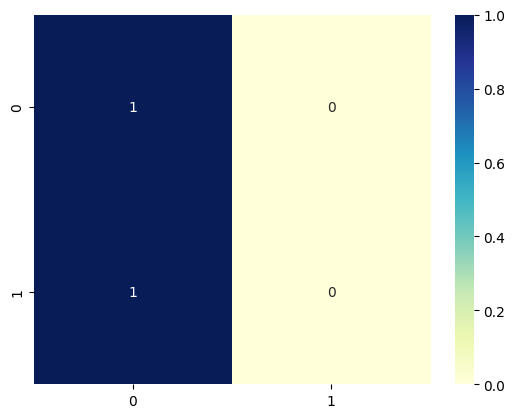

In [30]:
our_metrics(y_test, y_baseline_test)

## Baseline: <= 15% consumption is fraud

predicting fraud for clients with consummation/month in the lowest 15 % (change_index)

In [31]:
quantile_idx = df_cleaned[['index_change_month']].quantile(q=0.15)[0]
quantile_idx

5.75

In [32]:
df_cleaned.query('index_change_month <= @quantile_idx')['target'].value_counts()

target
0    625918
1     50654
Name: count, dtype: int64

In [33]:
# Defining baseline model that predicts the lowest 15 % (consummation per month) commit fraud
def baseline_model_idx(df, quantile_idx):
    y_pred = [1 if x <= quantile_idx else 0 for x in df['index_change_month']]
    return y_pred

In [34]:
# Compute predictions with baseline model for test set
y_baseline_idx_test = baseline_model_idx(X_test, quantile_idx)

Model Metrics and Normalized Confusion Matrix
_____________________
_____________________
Accuracy: 0.7922
_____________________
F1-score: 0.0979
_____________________
Fbeta_score with beta=1.5: 0.1114
_____________________
Fbeta_score with beta=2: 0.1207
_____________________
Fbeta_score with beta=3: 0.1309
_____________________
Recall 0.1429
_____________________
Specificity 0.8478


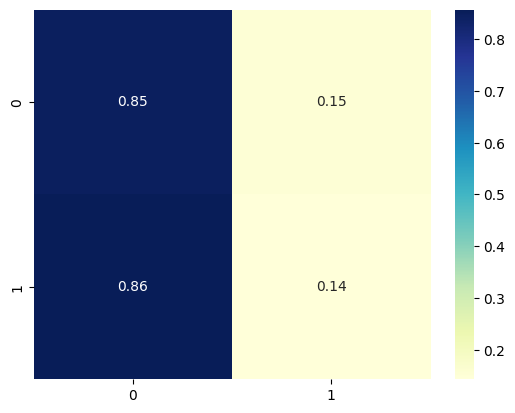

In [35]:
our_metrics(y_test, y_baseline_idx_test)

## Scaling

In [36]:
# import list of numerical features
%store -r num_features

no stored variable or alias num_features


In [37]:
# Scaling with Minmax-scaler
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
X_train_minmax_scaled = minmax_scaler.fit_transform(X_train[num_features])
X_test_minmax_scaled = minmax_scaler.transform(X_test[num_features])

NameError: name 'num_features' is not defined

In [ ]:
#concatenating minmax_scaled to dummys

X_train_minmax = np.concatenate([X_train_minmax_scaled, X_train.drop(num_features, axis=1)], axis=1)
X_test_minmax = np.concatenate([X_test_minmax_scaled, X_test.drop(num_features, axis=1)], axis=1)

In [ ]:
## Rescaling: Standardization-Scale
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_train_std_scaled = std_scaler.fit_transform(X_train[num_features])
X_test_std_scaled = std_scaler.transform(X_test[num_features])

In [ ]:
#concatenating std_scaled to dummys

X_train_std = np.concatenate([X_train_std_scaled, X_train.drop(num_features, axis=1)], axis=1)
X_test_std = np.concatenate([X_test_std_scaled, X_test.drop(num_features, axis=1)], axis=1)

## Test_1 and Test_2 Split of Scaled Data (not for Trees)

In [ ]:
# to avoid problems from large data set, we are splitting the Train-Set again in two parts.
# We will train various model incl. grid-search and cross-validation on half of the training-data,
# then train the final model on the entire training-data

# use the smaller set for grid-search and cross-validation
#for minmax-scalded data

X_train_minmax_small, X_train_minmax_large, y_train_small, y_train_large = train_test_split(X_train_minmax, y_train, test_size=0.7, random_state=RSEED, stratify=y_train)

# for std-scaled data
X_train_std_small, X_train_std_large, y_train_small, y_train_large = train_test_split(X_train_std, y_train, test_size=0.7, random_state=RSEED, stratify=y_train)

In [ ]:
%store -z

## ML-Model Assignment

* logistic regression = Anas
* Decision Tree = 
* Extra Tree 
* Random forest = Anna
* KNN =  Grace 
* Easy Ensemble classifier = Lana


## Store variables for ML-Notebooks

In [ ]:
# store the preprocessed, cleaned and scaled features and target
# %store X_train_minmax
# %store X_test_minmax 
# %store X_train_std
# %store X_test_std
# %store y_test
# %store y_train

## Storing to csv as storemagic keeps crashing the kernel



In [ ]:
# storing X and y for trees to csv as %store keeps crashing the Kernel

pd.DataFrame(X_train_tree).to_csv('data/X_train_tree.csv', index=False)


In [ ]:
pd.DataFrame(X_test_tree).to_csv('data/X_test_tree.csv', index=False)

In [ ]:

pd.DataFrame(y_train_tree).to_csv('data/y_train_tree.csv', index=False)


In [ ]:
pd.DataFrame(y_test_tree).to_csv('data/y_test_tree.csv', index=False)

In [ ]:
# storing  the test-test splits for trees to csv

pd.DataFrame(X_train_tree_small).to_csv('data/X_train_tree_small.csv', index=False)
pd.DataFrame(X_train_tree_large).to_csv('data/X_train_tree_large.csv', index=False)
pd.DataFrame(y_train_tree_small).to_csv('data/y_train_tree_small.csv', index=False)
pd.DataFrame(y_train_tree_large).to_csv('data/y_train_tree_large.csv', index=False)

In [ ]:
# storing to csv as %store keeps crashing the Kernel

pd.DataFrame(X_train_minmax).to_csv('data/X_train_minmax.csv', index=False)
pd.DataFrame(X_test_minmax).to_csv('data/X_test_minmax.csv', index=False)
pd.DataFrame(X_train_std).to_csv('data/X_train_std.csv', index=False)
pd.DataFrame(X_test_std).to_csv('data/X_test_std.csv', index=False)
pd.DataFrame(y_test).to_csv('data/y_test.csv', index=False)
pd.DataFrame(y_train).to_csv('data/y_train.csv', index=False)
pd.DataFrame(X_train).to_csv('data/X_train.csv', index=False)
pd.DataFrame(X_test).to_csv('data/X_test.csv', index=False) 



In [ ]:
# storing  the test-test splits to csv

pd.DataFrame(X_train_minmax_small).to_csv('data/X_train_minmax_small.csv', index=False)
pd.DataFrame(X_train_minmax_large).to_csv('data/X_train_minmax_large.csv', index=False)
pd.DataFrame(X_train_std_small).to_csv('data/X_train_std_small.csv', index=False)
pd.DataFrame(X_train_std_large).to_csv('data/X_train_std_large.csv', index=False)
pd.DataFrame(y_train_small).to_csv('data/y_train_small.csv', index=False)
pd.DataFrame(y_train_large).to_csv('data/y_train_large.csv', index=False)

In [ ]:
%store -z

In [ ]:
# log_reg = LogisticRegression()
# log_reg.fit(X=_train, y_train)

# y_pred_lr = log_reg.predict(x_test)

In [ ]:
# # logistic regression model 

# train_probs_lr = log_reg.predict_proba(x_train)[:, 1]
# test_probs_lr = log_reg.predict_proba(x_test)[:, 1]

# train_preds_lr = log_reg.predict(x_train)
# test_preds_lr = log_reg.predict(x_test)

# print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs_lr)}')
# print(f'Test ROC AUC  Score: {roc_auc_score(y_test, test_probs_lr)}')
# print(f'Baseline ROC AUC: {roc_auc_score(y_test, [1 for _ in range(len(y_test))])}')

In [ ]:


# # --!
# evaluate_model(test_preds_lr, test_probs_lr, train_preds_lr, train_probs_lr)



In [ ]:
# # K-neighbours classifier as baseline?


# # initialize and fit/train model on data

# knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
# knn.fit(x_train, np.ravel(y_train))

# # predict on test

# y_pred_knn = knn.predict(x_test)





In [ ]:
# # Make probability predictions
# train_probs_knn = knn.predict_proba(x_train)[:, 1]
# test_probs_knn = knn.predict_proba(x_test)[:, 1]

# train_preds_knn = knn.predict(x_train)
# test_preds_knn = knn.predict(x_test)

# print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs_knn)}')
# print(f'Test ROC AUC  Score: {roc_auc_score(y_test, test_probs_knn)}')
# print(f'Baseline ROC AUC: {roc_auc_score(y_test, [1 for _ in range(len(y_test))])}')


In [ ]:
# # sgdclassifier 

# # Fit and evaluate model without hyperparameter tuning using cross validation and unscaled data 
# sgd_classifier = SGDClassifier(random_state=RSEED)
# scores = cross_val_score(sgd_classifier, x_train, y_train, cv=5, n_jobs=-1)

# # Evaluation 
# print('Score (unscaled):', round(scores.mean(), 4))


In [ ]:
# save current version of processed data for use later

# df_processed.to_csv('data/fraud_data_processed_V1.csv', index=False)

